In [1]:
! pip install ultralytics

https://arxiv.org/abs/1506.02640 (yolo paper) <br/>
https://github.com/ultralytics/ultralytics (official lib, yolov8) <br/>
https://docs.ultralytics.com/quickstart/ (official doc) <br/>
https://www.youtube.com/@Ultralytics (official youtube channel) <br/>

**All output runs are executed in google colab**

In [82]:
# ultralytics is the official yolov8 recentlib. which makes it easy training yolo models.
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [ ]:
# load pre-trained yolo model
# bunch of conv layer and linear layers
model = YOLO('yolov8n.pt')

In [ ]:
# train the model
# data can be path of the existing know dataset or custom dataset
# coco128 dataset is 128 image dataset, for pipeline validation and educational purpose.
# it will download the datasets and put it under current root under datasets folder
result = model.train(data='./coco128.yaml', epochs=3);

In [29]:
total_train_imgs = list([f for f in  os.listdir('datasets/coco128/images/train2017') if '.jpg' in f])
print('total_train_imgs', len(total_train_imgs))

total_train_imgs 128


In [30]:
# training output metrics
result.results_dict

{'metrics/precision(B)': 0.6747735384313573,
 'metrics/recall(B)': 0.5473441410239326,
 'metrics/mAP50(B)': 0.6324539699661992,
 'metrics/mAP50-95(B)': 0.4668199131197199,
 'fitness': 0.4833833188043678}

In [ ]:
# eval model
results_eval = model.val()

In [34]:
# metrics on validation output
results_eval.results_dict

{'metrics/precision(B)': 0.6658783301790792,
 'metrics/recall(B)': 0.546774441480506,
 'metrics/mAP50(B)': 0.6247037468653667,
 'metrics/mAP50-95(B)': 0.46343421403676965,
 'fitness': 0.47956116731962933}

In [44]:
# pediction
predictions = model('https://ultralytics.com/images/bus.jpg')[0]


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 15.6ms
Speed: 3.6ms preprocess, 15.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)


In [57]:
# list of all bounding box coordinates, along with cls, confidence score, and
boxes = predictions.boxes

In [68]:
# data = [x_min, y_min, x_max, y_max, confidence, class]
# cls: class id
# conf: confidence score
# id: unique id
# is_track: if True, keeps the unique id same across frames in video sequences.
# orig_shae: input image shape
# shape: ??
# xywh: [x_center, y_center, width, height] : bounding box format
# xywhn: [x_center_normalized, y_center_normalized, width_normalized, height_normalized] ??
# xyxy: [x_min, y_min, x_max, y_max]
# xyxyn: [x_min_normalized, y_min_normalized, x_max_normalized, y_max_normalized]
boxes[0]

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([5.], device='cuda:0')
conf: tensor([0.8915], device='cuda:0')
data: tensor([[ 17.2280, 230.0987, 802.8792, 772.6516,   0.8915,   5.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([1, 6])
xywh: tensor([[410.0536, 501.3752, 785.6512, 542.5529]], device='cuda:0')
xywhn: tensor([[0.5062, 0.4642, 0.9699, 0.5024]], device='cuda:0')
xyxy: tensor([[ 17.2280, 230.0987, 802.8792, 772.6516]], device='cuda:0')
xyxyn: tensor([[0.0213, 0.2131, 0.9912, 0.7154]], device='cuda:0')

In [113]:
output = []
for box in boxes:
  output.append({
      'class_id': int(box.cls.item()),
      'class_name': predictions.names[box.cls.item()],
      'confidence_score': box.conf.item(),
      'track_id': box.id,
      'xyxy': box.xyxy.tolist()[0]
  })
output[0]

{'class_id': 5,
 'class_name': 'bus',
 'confidence_score': 0.8915185332298279,
 'track_id': None,
 'xyxy': [17.227970123291016,
  230.09873962402344,
  802.879150390625,
  772.651611328125]}

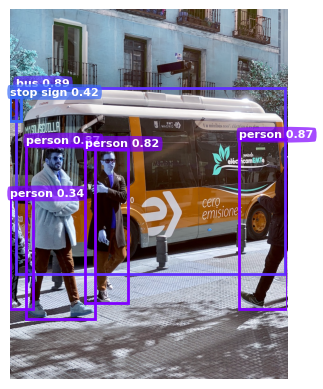

In [119]:
# plot the predicted bounding box using matplolib
_, ax = plt.subplots()
ax.imshow(predictions.orig_img);

# create color palette based on number of classes and use the class to pick the color
total_classes = len(predictions.names)
colors = plt.cm.rainbow([i / total_classes for i in range(total_classes)])

for i, box in enumerate(output):

  # bounding box value
  x_min, y_min, x_max, y_max = box['xyxy']
  width = x_max-x_min
  height = y_max-y_min

  color = colors[box['class_id']]

  # construct the rect
  rect = Rectangle((x_min, y_min), width=width, height=height, linewidth=2, edgecolor=color, facecolor=
                   'none')
  ax.add_patch(rect);

  # add text on top left cornoe
  text = f"{box['class_name']} {box['confidence_score']:.2f}"
  ax.text(x_min, y_min-5, s=text, color='white', fontsize=8, weight='bold', \
          bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', boxstyle='round4'))

ax.set_axis_off();
plt.show();

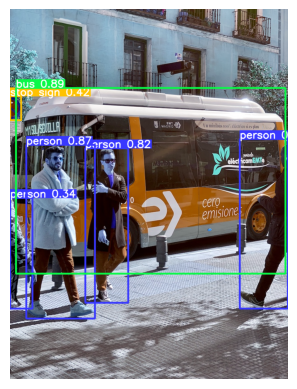

In [120]:
# directly get the bouding box output for plotting
plt.imshow(predictions.plot());
plt.axis('off');